In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [85]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [111]:
# CanaryS Gardenplace JAN-MAR-2020
airnow_glow = pd.read_csv('X:\RA_AirQuality\Datasets\\airnow-i25-glow\hourly\year-2020.csv')
airnow_glow.head()

,DateTime,NO2(I-25 Globeville|AirNow),PM2.5(I-25 Globeville|AirNow)
0,1/1/2020 1:00,59.0,29.6
1,1/1/2020 2:00,58.0,23.1
2,1/1/2020 3:00,54.0,19.9
3,1/1/2020 4:00,55.0,25.4
4,1/1/2020 5:00,NaN,20.8


In [112]:
airnow_glow.head()

,DateTime,NO2(I-25 Globeville|AirNow),PM2.5(I-25 Globeville|AirNow)
0,1/1/2020 1:00,59.0,29.6
1,1/1/2020 2:00,58.0,23.1
2,1/1/2020 3:00,54.0,19.9
3,1/1/2020 4:00,55.0,25.4
4,1/1/2020 5:00,NaN,20.8


In [113]:
airnow_glow.describe()

,NO2(I-25 Globeville|AirNow),PM2.5(I-25 Globeville|AirNow)
count,7827.000000,7598.000000
mean,24.924492,10.205975
std,14.255223,8.887736
min,0.000000,0.000000
25%,13.000000,4.500000
50%,23.000000,7.600000
75%,35.000000,13.300000
max,85.000000,154.100000


In [114]:
# airnow_glow = airnow_glow.set_index('DateTime')
airnow_glow.head()

,DateTime,NO2(I-25 Globeville|AirNow),PM2.5(I-25 Globeville|AirNow)
0,1/1/2020 1:00,59.0,29.6
1,1/1/2020 2:00,58.0,23.1
2,1/1/2020 3:00,54.0,19.9
3,1/1/2020 4:00,55.0,25.4
4,1/1/2020 5:00,NaN,20.8


In [115]:
airnow_glow['DateTime'] = pd.to_datetime(airnow_glow.DateTime)
airnow_glow.head()

,DateTime,NO2(I-25 Globeville|AirNow),PM2.5(I-25 Globeville|AirNow)
0,2020-01-01 01:00:00,59.0,29.6
1,2020-01-01 02:00:00,58.0,23.1
2,2020-01-01 03:00:00,54.0,19.9
3,2020-01-01 04:00:00,55.0,25.4
4,2020-01-01 05:00:00,NaN,20.8


<AxesSubplot:>

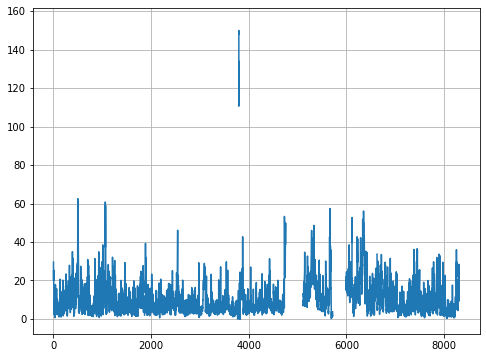

In [116]:
pm_data = airnow_glow['PM2.5(I-25 Globeville|AirNow)']
pm_data.plot(grid=True)

In [117]:
airnow_glow_non_indexed=airnow_glow.copy()

In [118]:
airnow_glow = airnow_glow.set_index('DateTime')

In [119]:
airnow_glow.loc['2020-01-01':'2020-01-03']

,NO2(I-25 Globeville|AirNow),PM2.5(I-25 Globeville|AirNow)
DateTime,,
2020-01-01 01:00:00,59.0,29.6
2020-01-01 02:00:00,58.0,23.1
2020-01-01 03:00:00,54.0,19.9
2020-01-01 04:00:00,55.0,25.4
2020-01-01 05:00:00,NaN,20.8
...,...,...
2020-01-03 19:00:00,20.0,6.7
2020-01-03 20:00:00,18.0,5.6
2020-01-03 21:00:00,18.0,5.7


In [131]:
airnow_glow['year'] = pd.DatetimeIndex(airnow_glow_non_indexed['DateTime']).year

In [ ]:
airnow_glow['month'] = pd.DatetimeIndex(airnow_glow_non_indexed['DateTime']).month

In [134]:
airnow_glow['day'] = pd.DatetimeIndex(airnow_glow_non_indexed['DateTime']).day

In [141]:
airnow_glow['2020':'2021'][['month','PM2.5(I-25 Globeville|AirNow)']].groupby('month').describe()

PM2.5(I-25 Globeville|AirNow)                                            \
                              count       mean        std  min     25%    50%   
month                                                                           
1                             732.0  10.608060   8.135330  0.7   5.100   8.35   
2                             685.0  10.711825   8.698895  0.7   4.300   8.30   
3                             712.0   8.342837   5.437998  1.3   4.200   6.90   
4                             698.0   7.629370   5.357893  0.6   4.125   6.10   
5                             635.0   7.518583   5.391447  0.8   3.900   5.70   
6                             657.0   8.132116  13.833065  0.0   3.800   5.60   
7                             570.0   9.365965   8.078138  2.0   4.700   7.30   
8                             407.0  16.768305   9.087682  3.8  10.300  14.70   
9                             371.0  14.150135   9.834609  0.2   7.250  12.60   
10                            708.0  15.612712  10.769801  1.5   6.800  12.90   
11                            680.0   9.075735   6.488393  0.7   4.300   7.40   
12                            743.0   8.642665   6.969473  0.3   3.400   6.50   

                      
          75%    max  
month                 
1      14.200   62.5  
2      15.100   60.8  
3      11.300   39.3  
4       9.575   46.1  
5       8.700   29.2  
6       8.200  154.1  
7      10.400   53.3  
8      20.850   48.6  
9      19.700   57.4  
10     22.200   56.1  
11     11.700   36.5  
12     11.650   36.0

In [167]:
airnow_glow.head()

,NO2(I-25 Globeville|AirNow),PM2.5(I-25 Globeville|AirNow),year,month,day
DateTime,,,,,
2020-01-01 01:00:00,59.0,29.6,2020,1,1
2020-01-01 02:00:00,58.0,23.1,2020,1,1
2020-01-01 03:00:00,54.0,19.9,2020,1,1
2020-01-01 04:00:00,55.0,25.4,2020,1,1
2020-01-01 05:00:00,NaN,20.8,2020,1,1


In [170]:
airnow_glow['2020':'2021'][['month','PM2.5(I-25 Globeville|AirNow)', 'NO2(I-25 Globeville|AirNow)']].groupby('month').agg({'PM2.5(I-25 Globeville|AirNow)':['max'], 'NO2(I-25 Globeville|AirNow)':['max']})

,PM2.5(I-25 Globeville|AirNow),NO2(I-25 Globeville|AirNow)
,max,max
month,,
1,62.5,77.0
2,60.8,85.0
3,39.3,54.0
4,46.1,63.0
5,29.2,48.0
6,154.1,46.0
7,53.3,47.0
8,48.6,63.0


array([<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>],
      dtype=object)

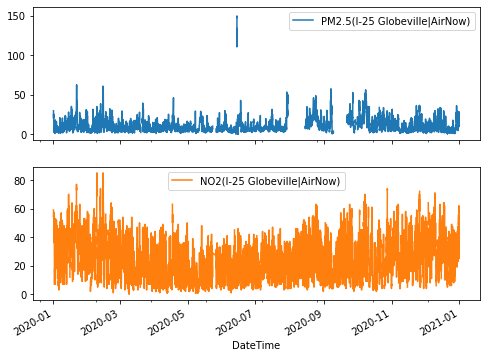

In [145]:
pm_data_2020=airnow_glow[['PM2.5(I-25 Globeville|AirNow)','NO2(I-25 Globeville|AirNow)']]
pm_data_2020.plot(subplots=True)

array([[<AxesSubplot:title={'center':'PM2.5(I-25 Globeville|AirNow)'}>,
        <AxesSubplot:title={'center':'NO2(I-25 Globeville|AirNow)'}>]],
      dtype=object)

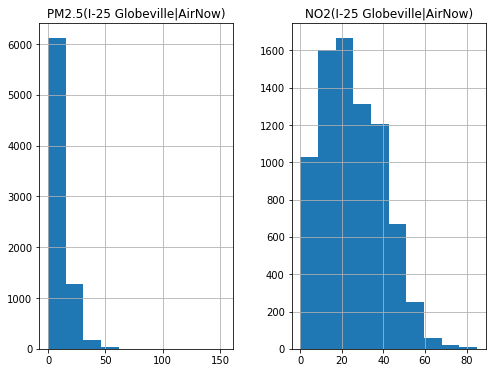

In [146]:
airnow_glow[['PM2.5(I-25 Globeville|AirNow)','NO2(I-25 Globeville|AirNow)']].hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

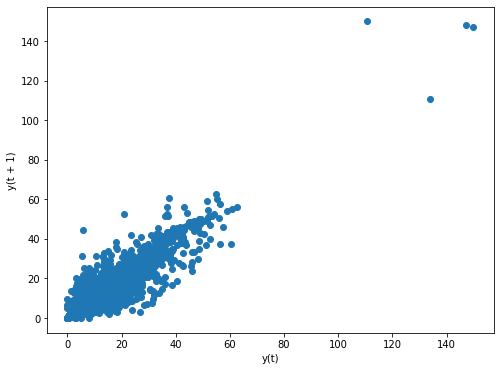

In [176]:
pd.plotting.lag_plot(airnow_glow['PM2.5(I-25 Globeville|AirNow)'],lag=1)

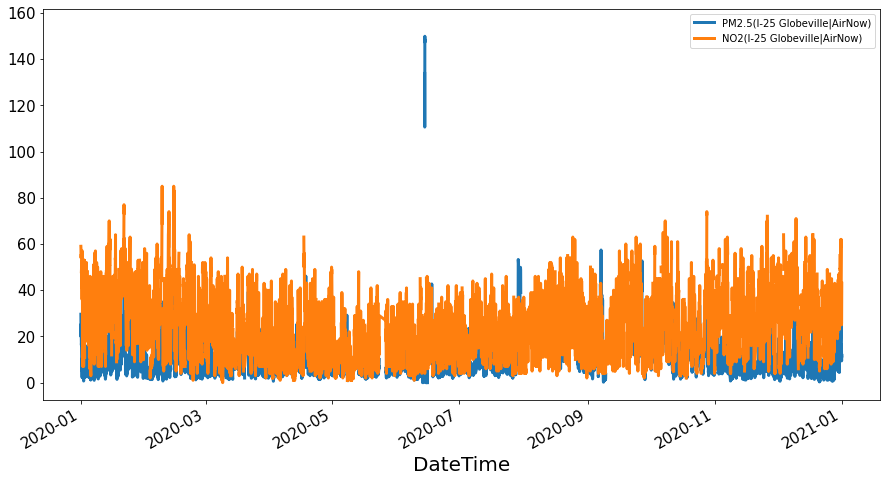

In [155]:
airnow_glow['2020':'2021'][['PM2.5(I-25 Globeville|AirNow)','NO2(I-25 Globeville|AirNow)']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

In [156]:
airnow_glow.isnull().values.any()

True

In [157]:
airnow_glow.isnull().any()

NO2(I-25 Globeville|AirNow)       True
PM2.5(I-25 Globeville|AirNow)     True
year                             False
month                            False
day                              False
dtype: bool

In [158]:
airnow_glow.isnull().sum()

NO2(I-25 Globeville|AirNow)      489
PM2.5(I-25 Globeville|AirNow)    718
year                               0
month                              0
day                                0
dtype: int64

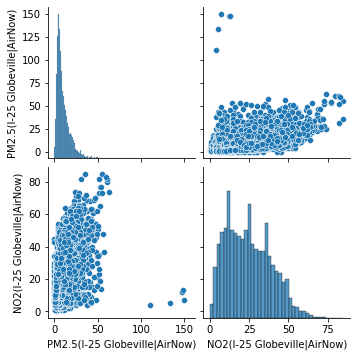

In [159]:
g = sns.pairplot(airnow_glow[['PM2.5(I-25 Globeville|AirNow)','NO2(I-25 Globeville|AirNow)']])

In [160]:
airnow_glow_corr=airnow_glow[['PM2.5(I-25 Globeville|AirNow)','NO2(I-25 Globeville|AirNow)']].corr(method='pearson')
airnow_glow_corr

,PM2.5(I-25 Globeville|AirNow),NO2(I-25 Globeville|AirNow)
PM2.5(I-25 Globeville|AirNow),1.000000,0.455758
NO2(I-25 Globeville|AirNow),0.455758,1.000000


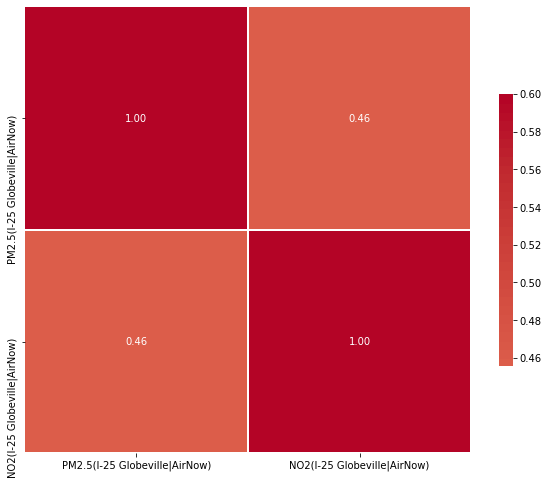

In [161]:
g = sns.heatmap(airnow_glow_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
plt.show()

In [162]:
airnow_glow_na = airnow_glow.copy()
airnow_glow_na=airnow_glow_na.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

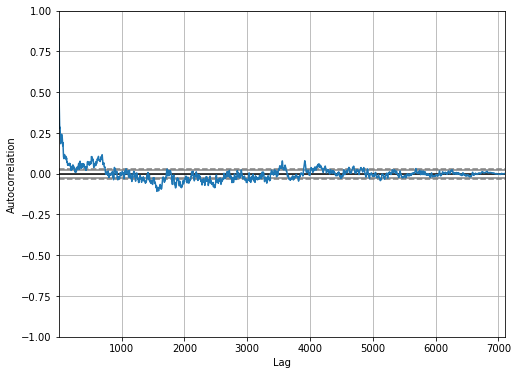

In [163]:
pd.plotting.autocorrelation_plot(airnow_glow_na['2020':'2021']['PM2.5(I-25 Globeville|AirNow)'])

In [164]:
airnow_glow_na['PM2.5(I-25 Globeville|AirNow)'].resample("1m").mean()

DateTime
2020-01-31    10.552855
2020-02-29    10.770533
2020-03-31     8.379346
2020-04-30     7.635258
2020-05-31     7.683737
2020-06-30     7.959609
2020-07-31     9.338007
2020-08-31    16.888889
2020-09-30    14.061383
2020-10-31    15.406476
2020-11-30     8.954890
2020-12-31     8.684241
2021-01-31    11.950000
Freq: M, Name: PM2.5(I-25 Globeville|AirNow), dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

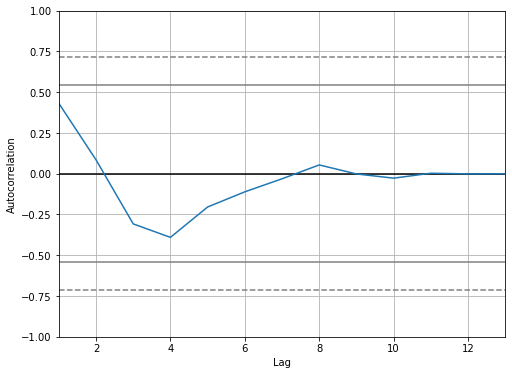

In [165]:
pd.plotting.autocorrelation_plot(airnow_glow_na['2020':'2021']['PM2.5(I-25 Globeville|AirNow)'].resample("1m").mean())